In [20]:
import pandas as pd
import numpy as np

file_path = 'appartements.csv'
df = pd.read_csv(file_path)

print(df.head())

# Surface
print("\nStatistiques sur la surface:")
print(f"Moyenne: {df['surface'].mean():.2f} m²")
print(f"Écart-type: {df['surface'].std():.2f} m²")
print(f"Minimale: {df['surface'].min():.2f} m²")
print(f"Maximale: {df['surface'].max():.2f} m²")

# Année
print("\nStatistiques sur l'année de construction:")
print(f"Moyenne: {df['annee'].mean():.2f}")
print(f"La plus ancienne: {df['annee'].min()}")
print(f"La plus récente: {df['annee'].max()}")

# Balcon
print(f"\nProportion d'appartements avec balcon: {df['balcon'].mean():.2%}")

# Catégories de prix
print("\nNombre d'appartements par catégorie de prix:")
print(df['price_category'].value_counts())

# Nombre de chambres
print("\nStatistiques sur le nombre de chambres:")
print(f"Moyenne: {df['nbRooms'].mean():.2f}")
print(f"Médiane: {df['nbRooms'].median():.2f}")
print(f"Variance: {df['nbRooms'].var():.2f}")
print(f"Écart-type: {df['nbRooms'].std():.2f}")

              id  nbRooms  surface  nbWindows   price  annee  balcon  garage  \
0  1726211958412        4       85          4  350000   2015    True   False   
1  1726211958413        2       50          3  200000   2018   False    True   
2  1726211958414        3       70          3  280000   2020    True    True   
3  1726211958415        1       30          2  120000   2010   False   False   
4  1726211958416        5      120          6  500000   2022    True    True   

   note      ville price_category  
0     4  Marseille           high  
1     5  Marseille         normal  
2     4  Marseille         normal  
3     3  Marseille            low  
4     5  Marseille           high  

Statistiques sur la surface:
Moyenne: 69.59 m²
Écart-type: 35.44 m²
Minimale: 20.00 m²
Maximale: 160.00 m²

Statistiques sur l'année de construction:
Moyenne: 2017.64
La plus ancienne: 2008
La plus récente: 2024

Proportion d'appartements avec balcon: 63.93%

Nombre d'appartements par catégorie de pri

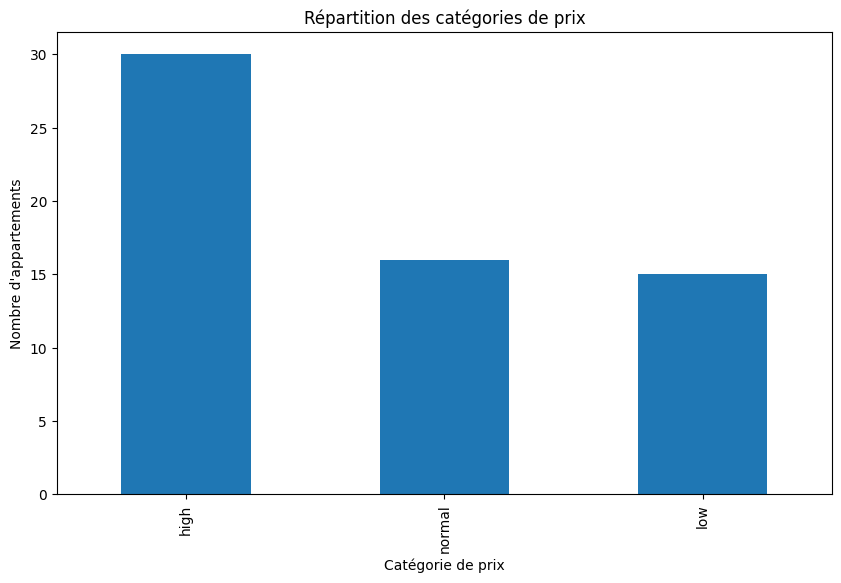

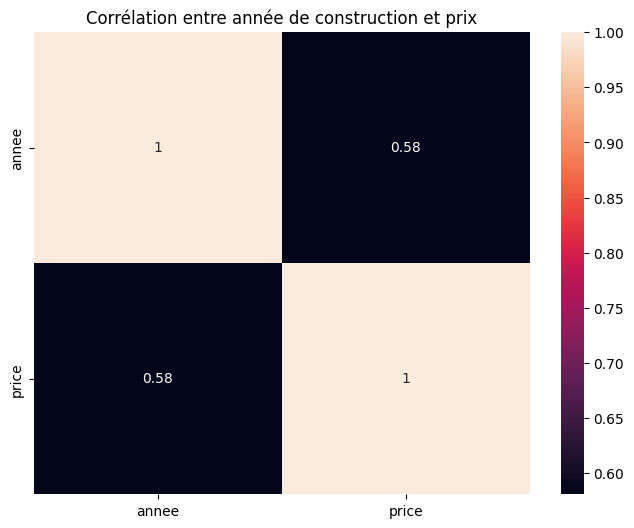

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# diagramme à barres des catégories de prix
plt.figure(figsize=(10, 6))
df['price_category'].value_counts().plot(kind='bar')
plt.title('Répartition des catégories de prix')
plt.xlabel('Catégorie de prix')
plt.ylabel('Nombre d\'appartements')
plt.show()

# heatmap de corrélation
plt.figure(figsize=(8, 6))
correlation = df[['annee', 'price']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Corrélation entre année de construction et prix')
plt.show()




In [22]:
import random

villes = ['Lyon', 'Paris', 'Marseille']
df['ville'] = [random.choice(villes) for _ in range(len(df))]

print(df.head())

              id  nbRooms  surface  nbWindows   price  annee  balcon  garage  \
0  1726211958412        4       85          4  350000   2015    True   False   
1  1726211958413        2       50          3  200000   2018   False    True   
2  1726211958414        3       70          3  280000   2020    True    True   
3  1726211958415        1       30          2  120000   2010   False   False   
4  1726211958416        5      120          6  500000   2022    True    True   

   note      ville price_category  
0     4  Marseille           high  
1     5       Lyon         normal  
2     4      Paris         normal  
3     3       Lyon            low  
4     5       Lyon           high  


In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, f1_score

df_encoded = pd.get_dummies(df, columns=['ville'])

# prédiction de la note
X = df_encoded[['ville_Lyon', 'ville_Paris', 'ville_Marseille', 'surface', 'price']]
y = df['note']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 score (note):", r2_score(y_test, y_pred))
print("RMSE (note):", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score (note): 0.6913114478420541
RMSE (note): 0.34190613731603303


In [24]:
X = pd.get_dummies(df['ville'])
y = df['annee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 score:", r2)
print("RMSE (en années):", rmse)

R2 score: -0.14182039431694404
RMSE (en années): 4.347898535651943


In [25]:
X = pd.get_dummies(df[['price', 'ville']])
y = df['garage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8461538461538461
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X = pd.get_dummies(df[['price', 'ville']])
y = df['balcon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8461538461538461
Recall: 0.8
F1 Score: 0.8888888888888888
